In [ ]:
####         The entire code is written, modified and executed by          ###
###                          Sheekar Banerjee                              ###
###                   Senior Software Engineer- AI & ML                    ###

In [ ]:
!pip install fastai --upgrade
!pip install nbdev

     |████████████████████████████████| 188 kB 5.3 MB/s 
     |████████████████████████████████| 60 kB 7.3 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 49 kB 2.8 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 561 kB 11.3 MB/s 
     |████████████████████████████████| 133 kB 46.2 MB/s 
     |████████████████████████████████| 130 kB 46.0 MB/s 
     |████████████████████████████████| 428 kB 41.1 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: Jinja2
    Found existin

In [ ]:
from fastai.vision.all import *

In [ ]:
path = "/content/drive/MyDrive/CheckBox/train"
size = 224
bs = 64

# data = DataBlock(blocks=(ImageBlock,CategoryBlock),
#                  get_items=get_image_files,
#                  splitter=RandomSplitter(),
#                 get_y=parent_label,
#                 item_tfms=RandomResizedCrop(224,min_scale=0.3),
#                 batch_tfms=aug_transforms())

data = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                get_y=parent_label,
                item_tfms=Resize(224),
                batch_tfms=aug_transforms())

In [ ]:
dls = data.dataloaders(path,bs=64)

['checked', 'no-checkbox', 'unchecked']

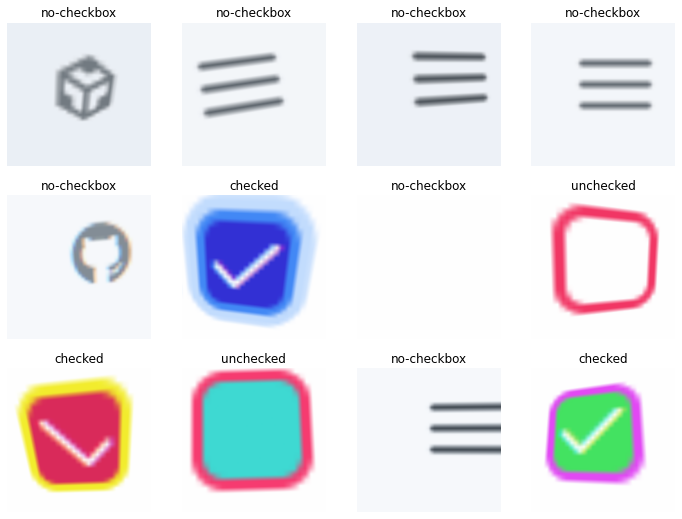

In [ ]:
dls.show_batch(max_n=12,nrows=3)
dls.vocab

In [ ]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.559272,0.043932,0.968750,01:05


epoch,train_loss,valid_loss,accuracy,time
0,0.005529,0.009622,1.000000,00:16
1,0.018367,0.047857,1.000000,00:14
2,0.014386,0.195073,0.898438,00:14
3,0.010216,0.000731,1.000000,00:14
4,0.007750,0.000001,1.000000,00:14
5,0.006208,0.000002,1.000000,00:14
6,0.005046,0.000002,1.000000,00:14
7,0.005514,0.000002,1.000000,00:14
8,0.004446,0.000001,1.000000,00:14
9,0.003626,0.000001,1.000000,00:14


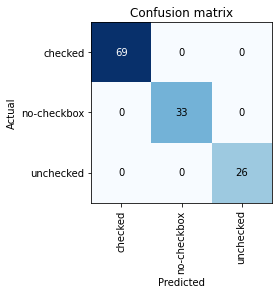

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

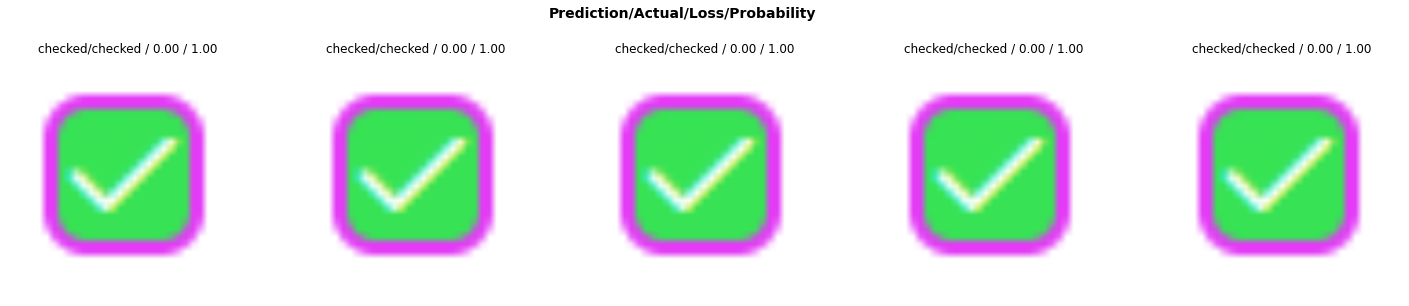

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [ ]:
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
learn.predict("/content/hyp.PNG")

('checked', TensorBase(0), TensorBase([9.9947e-01, 5.2550e-04, 4.3992e-07]))

In [ ]:
#save the model

learn.export('checkbox-fast-ai.pkl')